# Lecture 7 : Neural Network (ANN) example

## This is an example of how to train and test a neural network

### **Note:** this package requires that the input variables to the ANN model to be numeric, i.e., cannot handle categorical labels but integers only!

In [11]:
library(IRdisplay)
display_png(file="Lecture 7 - Student Placement Table.png", width=600) 

Warning message in file(con, "rb"):
“cannot open file 'Lecture 7 - Student Placement Table.png': No such file or directory”


ERROR: Error in file(con, "rb"): cannot open the connection


In [2]:
# creating training data set
TKS=c(20,10,30,20,80,30)
CSS=c(90,20,40,50,50,80)
Placed=c(1,0,0,0,1,1)

# Here, you will combine multiple columns or features into a single set of data
df=data.frame(TKS,CSS,Placed)

# check
print(df)


  TKS CSS Placed
1  20  90      1
2  10  20      0
3  30  40      0
4  20  50      0
5  80  50      1
6  30  80      1


## Construct the artificial neural network model


In [3]:
# load library
require(neuralnet)

set.seed(171)

# fit neural network
nn=neuralnet(Placed~TKS+CSS,data=df, hidden=3,act.fct = "logistic",
                linear.output = FALSE)

Loading required package: neuralnet



## Check the resulting neuralnet model

In [4]:
# inspect the resulting network
print(nn)

$call
neuralnet(formula = Placed ~ TKS + CSS, data = df, hidden = 3, 
    act.fct = "logistic", linear.output = FALSE)

$response
  Placed
1      1
2      0
3      0
4      0
5      1
6      1

$covariate
     TKS CSS
[1,]  20  90
[2,]  10  20
[3,]  30  40
[4,]  20  50
[5,]  80  50
[6,]  30  80

$model.list
$model.list$response
[1] "Placed"

$model.list$variables
[1] "TKS" "CSS"


$err.fct
function (x, y) 
{
    1/2 * (y - x)^2
}
<bytecode: 0x5654514c7518>
<environment: 0x5654514cbbe0>
attr(,"type")
[1] "sse"

$act.fct
function (x) 
{
    1/(1 + exp(-x))
}
<bytecode: 0x5654514c69e0>
<environment: 0x5654514c60e8>
attr(,"type")
[1] "logistic"

$linear.output
[1] FALSE

$data
  TKS CSS Placed
1  20  90      1
2  10  20      0
3  30  40      0
4  20  50      0
5  80  50      1
6  30  80      1

$exclude
NULL

$net.result
$net.result[[1]]
          [,1]
[1,] 0.4942406
[2,] 0.4941436
[3,] 0.4942405
[4,] 0.4942406
[5,] 0.4941083
[6,] 0.4942406


$weights
$weights[[1]]
$weights[[1]][[1]]
     

## Plot the neural network

In [5]:
# redirect plot to a PNG file
png(filename = "nn_plot.png", width = 480, height = 480)

# plot neural network
plot(nn,rep="best")
dev.off()

png 
  2

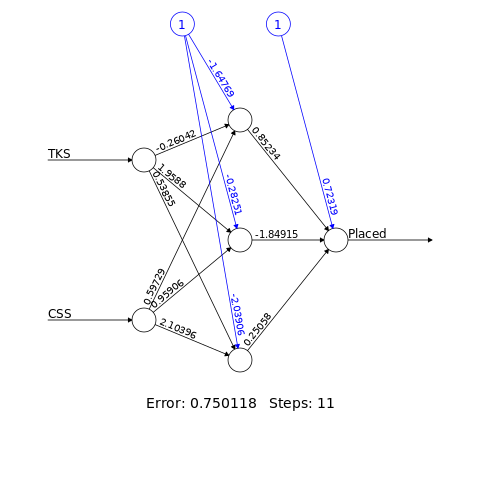

In [6]:
library("IRdisplay")
display_png(file="nn_plot.png") 

## Look at the weights of the network at input layer (A) and hidden layer (B)

In [7]:
nn$weights

[[1]]
[[1]][[1]]
           [,1]       [,2]       [,3]
[1,] -1.6476872 -0.2825058 -2.0390588
[2,] -0.2604191  1.9587979  0.5385502
[3,]  0.5972872  0.9590630  2.1039576

[[1]][[2]]
           [,1]
[1,]  0.7231929
[2,]  0.8523362
[3,] -1.8491512
[4,]  0.2505836

## Test the neural network model on test data


In [8]:

# creating test set
TKS = c(30,40,85)
CSS = c(85,50,40)
test = data.frame(TKS,CSS)

# inspect it
print(test)



  TKS CSS
1  30  85
2  40  50
3  85  40


## Obtain predictions for test data

In [9]:
## Prediction using neural network
preds=predict(nn,test)
print(preds)

          [,1]
[1,] 0.4942406
[2,] 0.4942406
[3,] 0.3950393


## Convert prediction scores to classification decisions

### In this case, the classification threshold is 0.5

In [10]:
decision <- ifelse(preds>0.5, 1,0)
data.frame(preds,decision)

preds,decision
<dbl>,<dbl>
0.4942406,0
0.4942406,0
0.3950393,0
